Height: 4, Aspect: 1.5


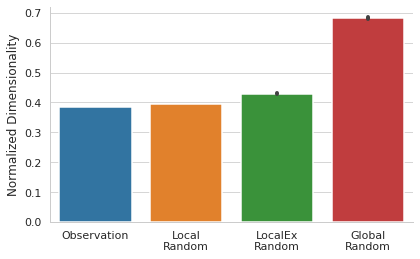

In [4]:
import random
import copy
import logging
import sys

from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'batch_dim_210119_plot_lv_20'


base_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim'

db = {}


# name = 'batch_dim_210119_naive_random2_10'
# dbb = compress_pickle.load(f'{base_path}/data/{name}.gz')
# db['naive_random2'] = dbb

# name = 'batch_dim_210119_naive_random3_100'
# dbb = compress_pickle.load(f'{base_path}/data/{name}.gz')
# db['naive_random3'] = dbb

# name = 'batch_dim_210119_data_1'
# dbb = compress_pickle.load(f'{base_path}/data/{name}.gz')
# db['data'] = dbb

# name = 'batch_dim_210119_global_random_100'
# dbb = compress_pickle.load(f'{base_path}/data/{name}.gz')
# db['global_random'] = dbb

# name = 'batch_dim_210119_expanded_random_30_100'
# dbb = compress_pickle.load(f'{base_path}/data/{name}.gz')
# db['expanded_random_30'] = dbb


for model_name in [
#         'naive_random2',
#         'naive_random3',
#         'naive_random_15_1',
        'naive_random_15_2',
#         'naive_random_15_3',
#         'naive_random_15_4',
#         'naive_random_17_2',
#         'naive_random_17_3',
        'expanded_random_30',
#         'expanded_random_50',
        'data',
        'global_random',
#         'classic_random',
        ]:
    name = f'batch_dim_210119_{model_name}_len_4096_20_10'
    dbb = compress_pickle.load(f'{base_path}/data/{name}.gz')
    db[model_name] = dbb


# db_old = compress_pickle.load(
#     '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim/data/'
#     'batch_dim_201205_db.gz')
# db_old = db_old[0]
# db['data'] = {0: [db_old['data'][0]]}

mpd = MyPlotData()

def get_plot_name(model_name):
    if 'data' == model_name:
        return 'Observation'
    if 'classic_random' == model_name:
        return 'Classic Random'
    if 'naive_random_15_2' == model_name:
        return 'Local\nRandom'
    if 'data' == model_name:
        return 'Data'
    if 'expanded_random_30' == model_name:
        return 'LocalEx\nRandom'
    if 'global_random' == model_name:
        return 'Global\nRandom'
    return model_name


for model_name in [
#         'naive_random2',
        'data',
        'naive_random_15_2',
#         'naive_random3',
        'expanded_random_30',
#         'expanded_random_50',
        'global_random',
#         'classic_random',
#         'naive_random_15_1',
#         'naive_random_15_3',
#         'naive_random_15_4',
#         'naive_random_17_2',
#         'naive_random_17_3',
        ]:
    ress = db[model_name][0]
    for res in ress:
        mpd.add_data_point(
            model=get_plot_name(model_name),
            mf_dim=res['mf_dim'],
            grc_dim=res['grc_dim'],
            grc_dim_norm=res['grc_dim']/466.7452596318479,
            pct_grc=res['pct_grc']/100,
            pct_mfs=res['pct_mfs']/100,
            pct_mf_dim=res['pct_mf_dim']/100,
            num_grcs=res['num_grcs'],
            num_mfs=res['num_mfs'],
            )

importlib.reload(my_plot); my_plot.my_catplot(
    mpd,
    x='model',
    y='pct_grc',
    context='paper',
    kind='bar',
    errwidth=4,
    height=4,
    aspect=1.5,
    font_scale=1.25,
    y_axis_label='Normalized Dimensionality',
#     y_axis_label='Dim / # of GrCs',
#     x_axis_label='Normalized Dimensionality',
    save_filename=f'{script_n}_norm_dim_grc.svg',
    show=True,
    )

# importlib.reload(my_plot); my_plot.my_catplot(
#     mpd,
#     x='model',
#     y='pct_mfs',
#     context='paper',
#     height=4,
#     aspect=1.33,
#     y_axis_label='Dim / MF dim',
#     x_axis_label='Normalized Dimensionality',
#     save_filename=f'{script_n}_pct_mfs.svg',
#     show=True,
#     )

# importlib.reload(my_plot); my_plot.my_catplot(
#     mpd,
#     x='model',
#     y='pct_mf_dim',
#     context='paper',
#     height=4,
#     aspect=2.33,
#     y_axis_label='Dim / MF dim',
#     x_axis_label='Normalized Dimensionality',
#     save_filename=f'{script_n}_pct_mf_dim.svg',
#     show=True,
#     )



In [3]:
mpd.data

[{'model': 'Observation',
  'mf_dim': 434.9303375833406,
  'grc_dim': 466.7452596318479,
  'grc_dim_norm': 0.7191155598888818,
  'pct_grc': 0.385,
  'pct_mfs': 0.958,
  'pct_mf_dim': 1.073,
  'num_grcs': 1211,
  'num_mfs': 487},
 {'model': 'Observation',
  'mf_dim': 435.2812005046534,
  'grc_dim': 465.57547264388444,
  'grc_dim_norm': 0.7173132662234601,
  'pct_grc': 0.384,
  'pct_mfs': 0.956,
  'pct_mf_dim': 1.069,
  'num_grcs': 1211,
  'num_mfs': 487},
 {'model': 'Observation',
  'mf_dim': 435.35796966799984,
  'grc_dim': 466.5541759031157,
  'grc_dim_norm': 0.7188211567219781,
  'pct_grc': 0.385,
  'pct_mfs': 0.958,
  'pct_mf_dim': 1.071,
  'num_grcs': 1211,
  'num_mfs': 487},
 {'model': 'Observation',
  'mf_dim': 435.26543074368465,
  'grc_dim': 465.9872542843188,
  'grc_dim_norm': 0.7179476992011973,
  'pct_grc': 0.384,
  'pct_mfs': 0.956,
  'pct_mf_dim': 1.07,
  'num_grcs': 1211,
  'num_mfs': 487},
 {'model': 'Observation',
  'mf_dim': 435.6556094352554,
  'grc_dim': 464.47988059

Height: 4, Aspect: 1


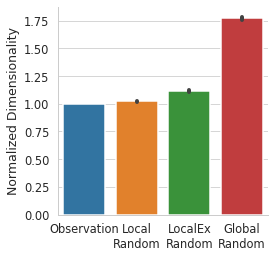

In [5]:

importlib.reload(my_plot); my_plot.my_catplot(
    mpd,
    x='model',
    y='grc_dim_norm',
    context='paper',
    height=4,
    aspect=1,
    errwidth=4,
    font_scale=1.3,
    ci=100,
    y_axis_label='Normalized Dimensionality',
#     y_axis_label='Dim / # of GrCs',
#     x_axis_label='Normalized Dimensionality',
    save_filename=f'{script_n}_norm_dim_grc_by_local.svg',
    show=True,
    )


In [18]:
db['data']

{0: {'mf_dim': 474.7653773986999,
  'grc_dim': 681.5008632400699,
  'pct_grc': 56.2,
  'pct_mfs': 126.9,
  'pct_mf_dim': 143.5,
  'num_grcs': 1211,
  'num_mfs': 537}}

In [40]:
db_old

{'expanded_random_30': {0: {'mf_dim': 438.5370036705424,
   'grc_dim': 656.5114131903176,
   'pct_grc': 54.2,
   'pct_mfs': 133.7,
   'pct_mf_dim': 149.7,
   'num_grcs': 1211,
   'num_mfs': 491}},
 'expanded_random_50': {0: {'mf_dim': 474.7653773986999,
   'grc_dim': 681.5008632400699,
   'pct_grc': 56.2,
   'pct_mfs': 126.9,
   'pct_mf_dim': 143.5,
   'num_grcs': 1211,
   'num_mfs': 537}},
 'data': {0: {'mf_dim': 474.7653773986999,
   'grc_dim': 681.5008632400699,
   'pct_grc': 56.2,
   'pct_mfs': 126.9,
   'pct_mf_dim': 143.5,
   'num_grcs': 1211,
   'num_mfs': 537}},
 'classic_random': {0: {'mf_dim': 434.9303375833406,
   'grc_dim': 735.8111799694942,
   'pct_grc': 60.7,
   'pct_mfs': 151.0,
   'pct_mf_dim': 169.1,
   'num_grcs': 1211,
   'num_mfs': 487}},
 'naive_random_17_1': {0: {'mf_dim': 414.05600382650914,
   'grc_dim': 572.5242247256178,
   'pct_grc': 47.2,
   'pct_mfs': 124.1,
   'pct_mf_dim': 138.2,
   'num_grcs': 1211,
   'num_mfs': 461}},
 'naive_random_17_4': {0: {'mf_di